In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
df=pd.read_csv('gaiaqueryresults.csv')
df.shape

(195, 158)

In [3]:
df.drop(columns='idtable_oid', inplace=True)

In [4]:
milliarcsecs=df.parallax.values

In [5]:
arcsecs=milliarcsecs/1000

In [6]:
parsecs=1/arcsecs

In [7]:
df['distance']=parsecs

In [8]:
distancemod=-5*np.log10(parsecs)+5

In [9]:
df['g_absmag']=df['phot_g_mean_mag']+distancemod
df['bp_absmag']=df['phot_bp_mean_mag']+distancemod
df['rp_absmag']=df['phot_rp_mean_mag']+distancemod

In [10]:
df['abs_g_rp']=df['g_absmag']-df['rp_absmag']
df['abs_bp_rp']=df['bp_absmag']-df['rp_absmag']
df['abs_bp_g']=df['bp_absmag']-df['g_absmag']

In [11]:
df

,pop_id,TIC,gaiadr3_source_id,epic_id,per,solution_id,designation,source_id,random_index,ref_epoch,...,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,distance,g_absmag,bp_absmag,rp_absmag,abs_g_rp,abs_bp_rp,abs_bp_g
0,0,59129133.0,3392549449695395968,246676629.0,0.6253,1.636148e+18,Gaia DR3 3392549449695395968,3.392549e+18,8.915612e+08,2016.0,...,0.4993,0.5033,MARCS,157.596177,8.059673,9.687813,6.807319,1.252354,2.880494,1.628140
1,1,59091144.0,3392553852037339776,246682490.0,3.6324,1.636148e+18,Gaia DR3 3392553852037339776,3.392554e+18,1.655738e+09,2016.0,...,NaN,NaN,NaN,165.034043,7.817309,8.750867,6.066332,1.750977,2.684535,0.933558
2,2,118769116.0,3411342134934571520,247343526.0,0.3568,1.636148e+18,Gaia DR3 3411342134934571520,3.411342e+18,1.346283e+09,2016.0,...,NaN,NaN,NaN,119.362410,10.708788,12.928357,9.329026,1.379762,3.599331,2.219569
3,3,175594111.0,6045818685674325760,203354381.0,0.5993,1.636148e+18,Gaia DR3 6045818685674325760,6.045819e+18,6.201327e+08,2016.0,...,0.5288,0.5358,MARCS,141.893638,8.297371,9.967827,7.041096,1.256275,2.926731,1.670456
4,4,322928171.0,6048612514663537280,203636498.0,0.7794,1.636148e+18,Gaia DR3 6048612514663537280,6.048613e+18,5.897967e+08,2016.0,...,0.6543,0.6875,MARCS,133.996046,9.802926,11.935682,8.448630,1.354296,3.487052,2.132756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,192,245792696.0,3312903580454386048,210554781.0,11.4675,1.636148e+18,Gaia DR3 3312903580454386048,3.312904e+18,1.345169e+09,2016.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,193,268510346.0,147940663906992512,247888948.0,1.4853,1.636148e+18,Gaia DR3 147940663906992512,1.479407e+17,5.553692e+08,2016.0,...,0.1319,0.1889,MARCS,85.111939,5.316872,5.824054,4.646624,0.670248,1.177430,0.507182
192,194,245869001.0,3313384651152556416,246932950.0,2.6815,1.636148e+18,Gaia DR3 3313384651152556416,3.313385e+18,3.966323e+07,2016.0,...,0.3434,0.3462,MARCS,233.456953,2.571005,2.992190,1.968274,0.602731,1.023916,0.421185
193,195,60005364.0,147182172683187712,247857331.0,7.4762,1.636148e+18,Gaia DR3 147182172683187712,1.471822e+17,1.270244e+09,2016.0,...,0.0001,0.0062,MARCS,49.281361,5.770862,6.343783,5.048701,0.722161,1.295082,0.572921


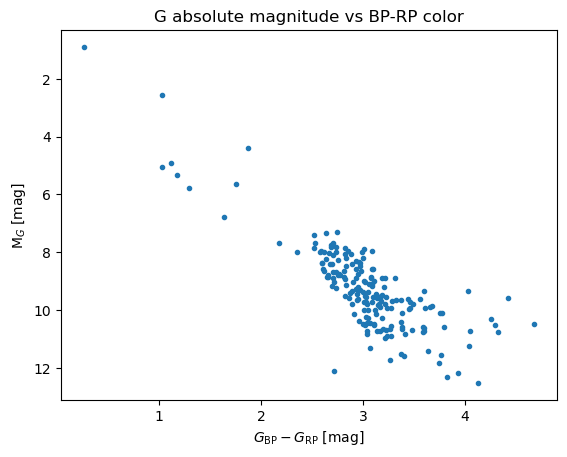

In [12]:
plt.scatter(df.abs_bp_rp,df.g_absmag,marker='.')
plt.gca().invert_yaxis()
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G_{\text{BP}}-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs BP-RP color')
plt.show()

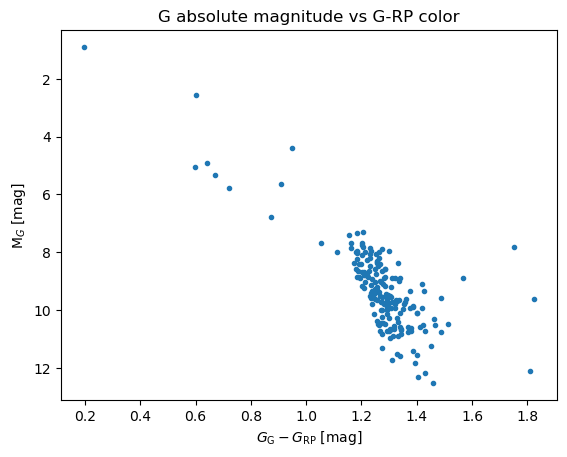

In [13]:
plt.scatter(df.abs_g_rp,df.g_absmag,marker='.')
plt.gca().invert_yaxis()
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G_{\text{G}}-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs G-RP color')
plt.show()

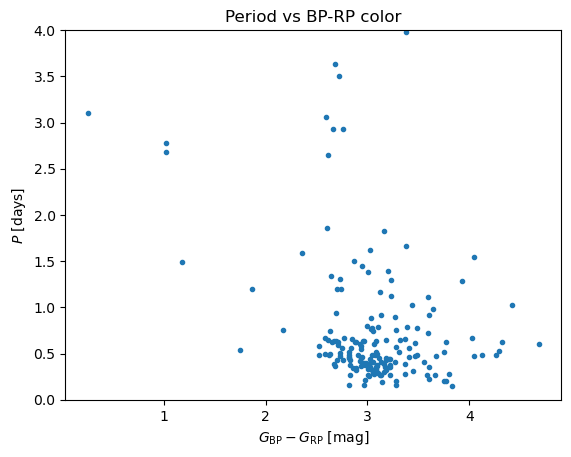

In [14]:
plt.scatter(df.abs_bp_rp,df.per,marker='.')
plt.ylabel(r'$P$ [days]')
plt.xlabel(r'$G_{\text{BP}}-G_{\text{RP}}$ [mag]')
plt.title('Period vs BP-RP color')
plt.ylim(0,4) #cutting out some outliers for better visibility
plt.show()

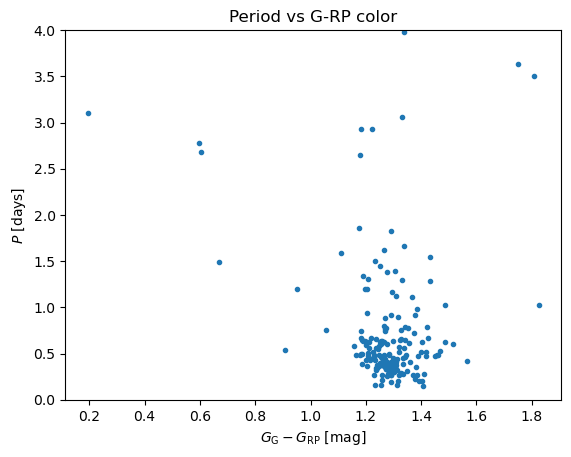

In [15]:
plt.scatter(df.abs_g_rp,df.per,marker='.')
plt.ylabel(r'$P$ [days]')
plt.xlabel(r'$G_{\text{G}}-G_{\text{RP}}$ [mag]')
plt.title('Period vs G-RP color')
plt.ylim(0,4) #cutting out some outliers for better visibility
plt.show()

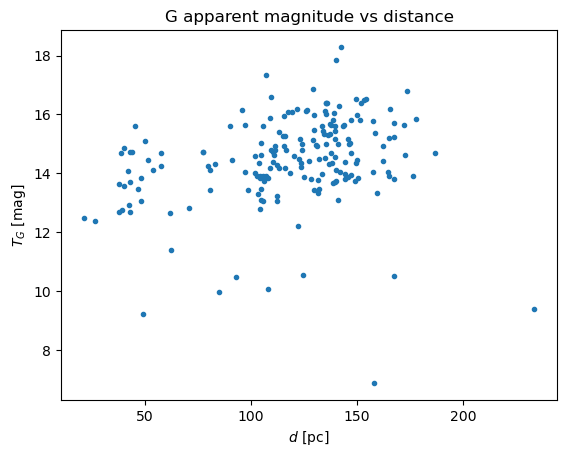

In [16]:
plt.scatter(df.distance,df.phot_g_mean_mag,marker='.')
plt.ylabel(r'$T_G$ [mag]')
plt.xlabel(r'$d$ [pc]')
plt.title('G apparent magnitude vs distance')
plt.show()

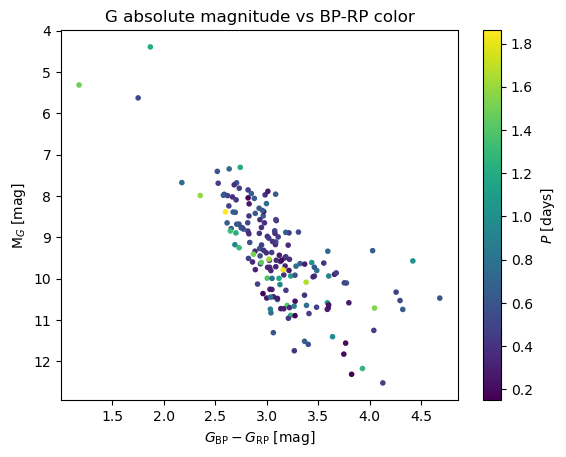

In [17]:
#first filter out period above 2
filtereddf=df[df['per']<=2]
plt.scatter(filtereddf.abs_bp_rp,filtereddf.g_absmag,c=filtereddf.per,marker='.')
plt.gca().invert_yaxis()
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G_{\text{BP}}-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs BP-RP color')
cbar=plt.colorbar()
cbar.ax.set_ylabel(r'$P$ [days]')
plt.show()

In [18]:
#okay still hard to see the period variation so going to try a log scale instead of filtering
import matplotlib.colors as colors

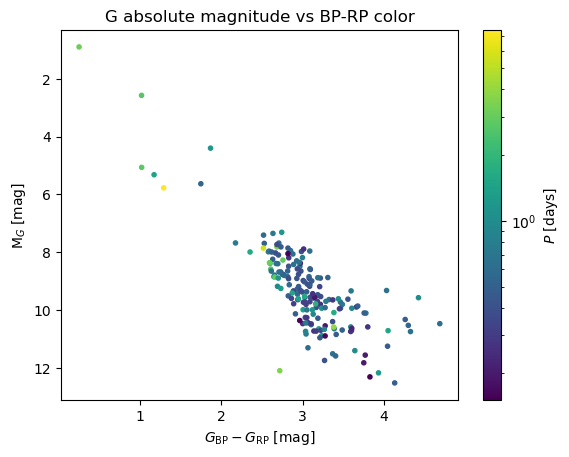

In [19]:
plt.scatter(df.abs_bp_rp,df.g_absmag,c=df.per,norm=colors.LogNorm(),marker='.')
plt.gca().invert_yaxis()
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G_{\text{BP}}-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs BP-RP color')
cbar=plt.colorbar()
cbar.ax.set_ylabel(r'$P$ [days]')
plt.show()

In [20]:
from matplotlib.ticker import FuncFormatter

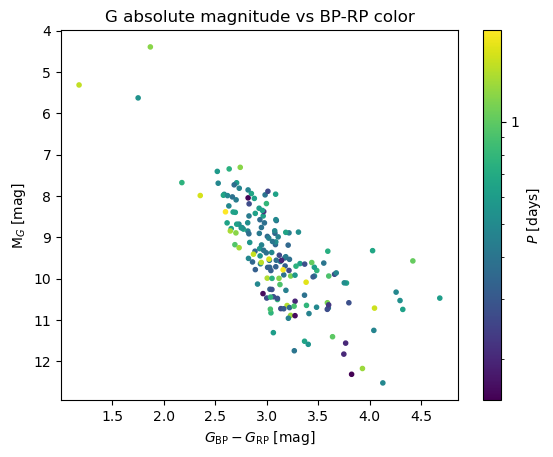

In [21]:
#do the filtering too
plt.scatter(filtereddf.abs_bp_rp,filtereddf.g_absmag,c=filtereddf.per,norm=colors.LogNorm(),marker='.')
plt.gca().invert_yaxis()
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G_{\text{BP}}-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs BP-RP color')
cbar=plt.colorbar()
cbar.ax.set_ylabel(r'$P$ [days]')
cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:g}')) #thank you chatgpt
plt.show()

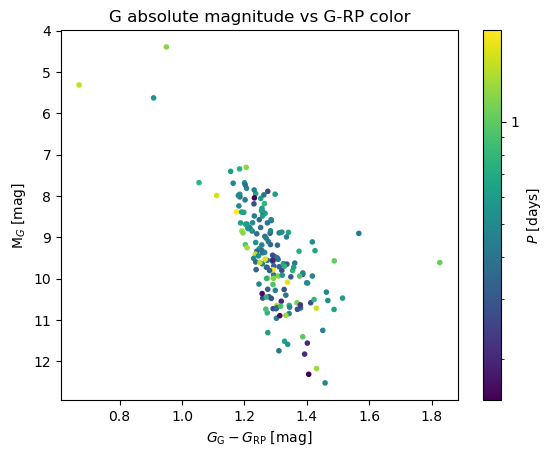

In [22]:
plt.scatter(filtereddf.abs_g_rp,filtereddf.g_absmag,c=filtereddf.per,norm=colors.LogNorm(),marker='.')
plt.gca().invert_yaxis()
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G_{\text{G}}-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs G-RP color')
cbar=plt.colorbar()
cbar.ax.set_ylabel(r'$P$ [days]')
cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:g}')) #thank you chatgpt
plt.show()